### Project Description: Electric Vehicle Data Analysis and Prediction
 ### This project focuses on analyzing and predicting key metrics related to electric vehicles using a dataset containing various attributes of electric vehicles. The project is  divided into several stages, including exploratory data analysis (EDA), data preprocessing, data transformation, model training, and feature importance analysis.

### 1. Importing Necessary Libraries

Explanation: This code imports essential Python libraries for data manipulation (pandas, numpy), visualization (matplotlib, seaborn), and machine learning tasks (sklearn).

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix


### 2. Loading Data

Explanation: Load the dataset from a CSV file and provides an overview by displaying the first few rows, summary statistics, and data types.

In [42]:
df = pd.read_csv(r"C:\Users\youse\Desktop\Electric Vehicle Data USA - Washington\archive (5)\Electric_Vehicle_Population_Data.csv")  # Load data from a CSV file


In [43]:
df.head() # Display the first few rows

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1C4RJXN66R,Snohomish,Everett,WA,98204.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,21.0,261311557,POINT (-122.2507211 47.8976713),PUGET SOUND ENERGY INC,5.306104e+10
1,KNDJX3AEXG,King,Renton,WA,98058.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950.0,11.0,210641315,POINT (-122.1476337 47.4438471),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJ3E1EA3L,King,Seattle,WA,98125.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,46.0,124517347,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1G1RC6S5XH,Kitsap,Port Orchard,WA,98367.0,2017,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53.0,0.0,26.0,7832933,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10
4,5UXTA6C09P,Snohomish,Monroe,WA,98272.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,39.0,235249262,POINT (-121.968385 47.854897),PUGET SOUND ENERGY INC,5.306105e+10


In [44]:
df.describe()  # Display basic statistics

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,194223.000000,194232.000000,194230.000000,194230.000000,193800.000000,1.942320e+05,1.942230e+05
mean,98175.800678,2020.781807,54.835458,978.730732,29.009954,2.248923e+08,5.297532e+10
std,2435.345863,2.999041,89.614355,7988.719011,14.901335,7.357830e+07,1.607770e+09
min,1731.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,17.000000,1.872251e+08,5.303301e+10
50%,98125.000000,2022.000000,0.000000,0.000000,33.000000,2.339402e+08,5.303303e+10
75%,98372.000000,2023.000000,68.000000,0.000000,42.000000,2.601159e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [45]:
df.info()  # Display information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194232 entries, 0 to 194231
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         194232 non-null  object 
 1   County                                             194223 non-null  object 
 2   City                                               194223 non-null  object 
 3   State                                              194232 non-null  object 
 4   Postal Code                                        194223 non-null  float64
 5   Model Year                                         194232 non-null  int64  
 6   Make                                               194232 non-null  object 
 7   Model                                              194232 non-null  object 
 8   Electric Vehicle Type                              194232 non-null  object

### 3. Data Cleaning

In [46]:
df.isnull().sum()  # Check for missing values

VIN (1-10)                                             0
County                                                 9
City                                                   9
State                                                  0
Postal Code                                            9
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         2
Base MSRP                                              2
Legislative District                                 432
DOL Vehicle ID                                         0
Vehicle Location                                      13
Electric Utility                                       9
2020 Census Tract                                      9
dtype: int64

In [47]:
# Handling duplicates
df = df.drop_duplicates()

Description: This block defines categorical columns with missing values and uses SimpleImputer to fill missing values with the most frequent value (mode) for these columns.

In [48]:
# Define columns with categorical data
categorical_columns = ['County', 'City', 'Postal Code', 'Electric Utility', '2020 Census Tract']

# Initialize SimpleImputer for mode imputation
mode_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation
df[categorical_columns] = mode_imputer.fit_transform(df[categorical_columns])


Description: This section handles numeric columns with missing values. It demonstrates how to use SimpleImputer to fill in missing values with the mean or median, depending on the distribution of the data.

In [49]:
# Define columns with numeric data
numeric_columns = ['Electric Range', 'Base MSRP']

# Initialize SimpleImputer for mean or median imputation
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')

# Apply imputation for numeric columns
df[numeric_columns] = mean_imputer.fit_transform(df[numeric_columns])  # Use 'mean' if the data is normally distributed
# df[numeric_columns] = median_imputer.fit_transform(df[numeric_columns])  # Use 'median' if the data has outliers


Description: This code addresses columns with a high percentage of missing values. It provides two options: dropping the column if it's not essential, or using predictive models for imputation if the column is critical.

In [50]:
# Define the column with a high proportion of missing values
high_missing_column = 'Legislative District'

# Option 1: Drop the column if it’s not critical
df = df.drop(columns=[high_missing_column])

# Option 2: Impute if the column is critical (e.g., using predictive modeling)
# Here, you might use machine learning models to predict missing values.
# This example does not include predictive imputation but suggests that approach.


Description: This block deals with columns having a moderate number of missing values. It uses SimpleImputer to fill missing values with the most frequent value (mode) for the specified column.

In [51]:
# Define the column with moderate missing values
moderate_missing_column = 'Vehicle Location'

# Initialize SimpleImputer for mode imputation
mode_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation and ensure the result is in the correct format
df[moderate_missing_column] = mode_imputer.fit_transform(df[[moderate_missing_column]].values.reshape(-1, 1)).ravel()


Description: This code checks if there are any remaining missing values in the dataset and prints summary statistics to review the dataset after imputation and cleaning.

Each code block focuses on different aspects of handling missing values, tailored to the type and extent of missing data in your dataset.

In [52]:
df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [53]:
df.describe()

,Model Year,Electric Range,Base MSRP,DOL Vehicle ID
count,194232.000000,194232.000000,194232.000000,1.942320e+05
mean,2020.781807,54.835458,978.730732,2.248923e+08
std,2.999041,89.613894,7988.677881,7.357830e+07
min,1997.000000,0.000000,0.000000,4.385000e+03
25%,2019.000000,0.000000,0.000000,1.872251e+08
50%,2022.000000,0.000000,0.000000,2.339402e+08
75%,2023.000000,68.000000,0.000000,2.601159e+08
max,2025.000000,337.000000,845000.000000,4.792548e+08


### 4. Exploratory Data Analysis (EDA)

Description: This section computes and visualizes the correlation matrix for selected numerical columns using a heatmap. It helps to understand the relationships between different features.

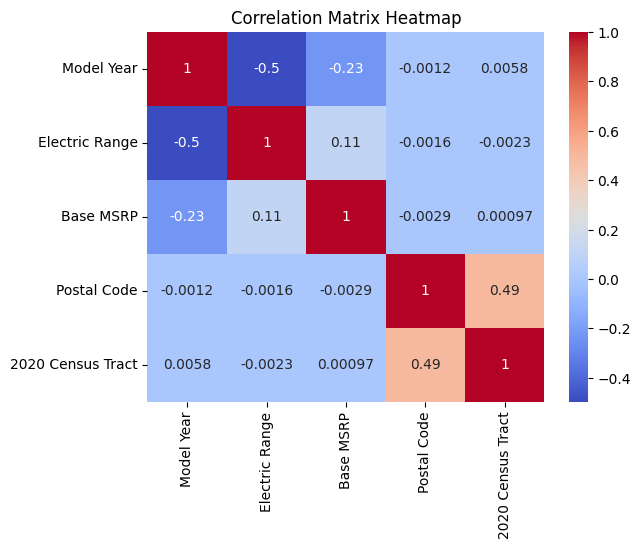

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for numerical columns
correlation_matrix = df[['Model Year', 'Electric Range', 'Base MSRP', 'Postal Code', '2020 Census Tract']].corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [55]:
print(df.columns)


Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility',
       '2020 Census Tract'],
      dtype='object')


### 5. Data Sampling and Visualization - Scatter Plots

Description: This section samples 10,000 rows from the dataset, filters it to include only the top 5 car makes, and creates scatter plots to visualize relationships between selected features, colored by car make.

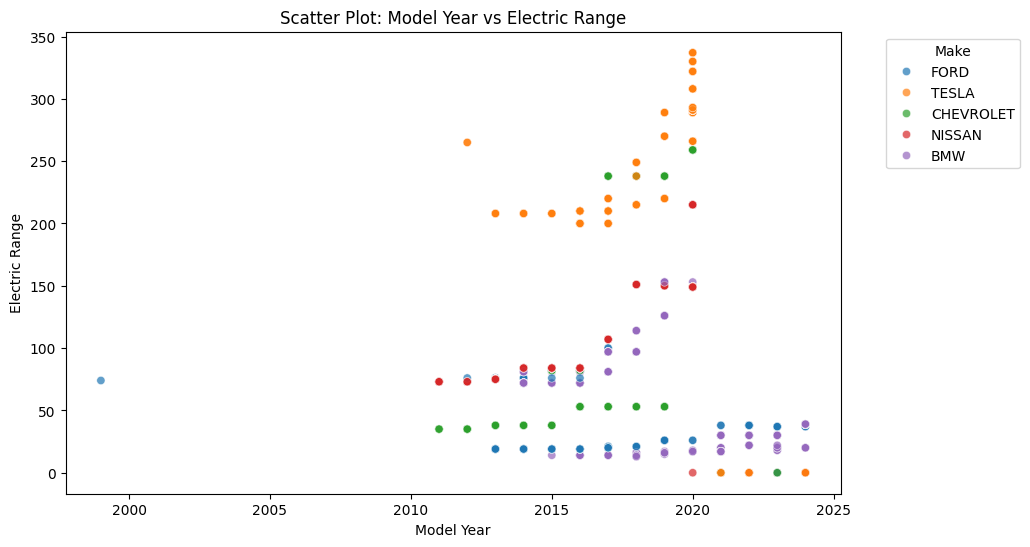

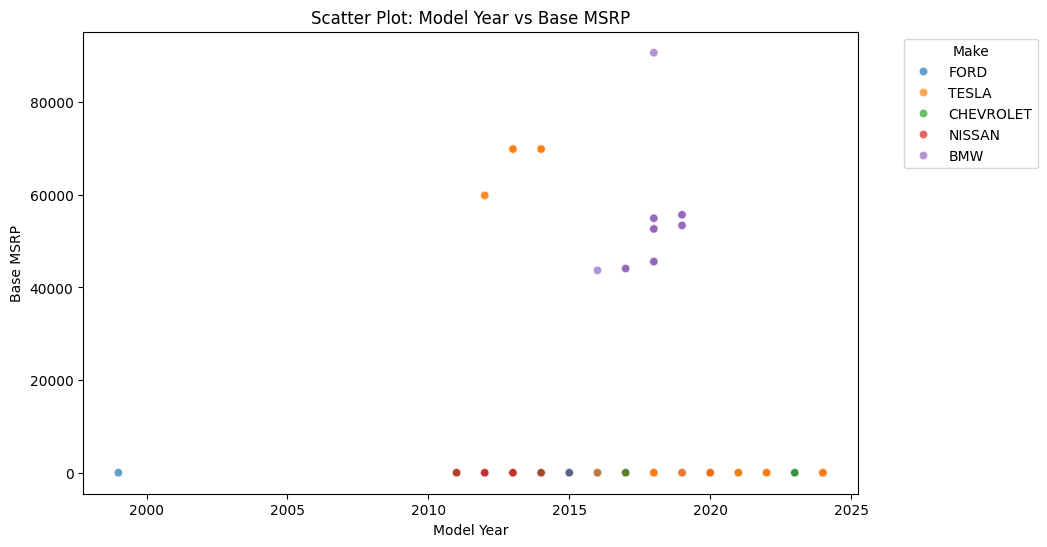

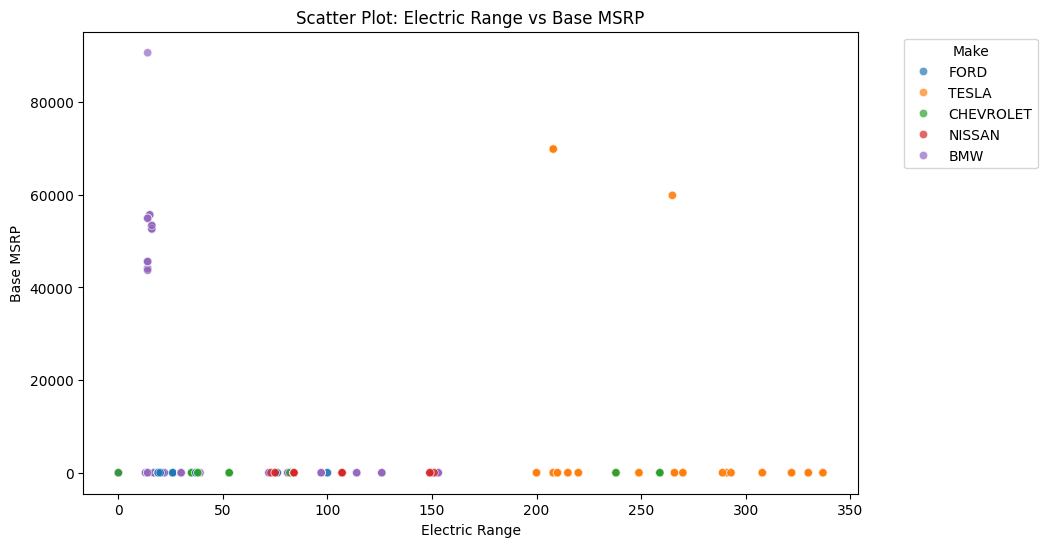

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample a subset of the data (e.g., 10,000 rows)
sampled_df = df.sample(n=10000, random_state=1)

# Limit to top N makes
top_makes = sampled_df['Make'].value_counts().nlargest(5).index
filtered_df = sampled_df[sampled_df['Make'].isin(top_makes)]

# Define pairs of columns to plot
pairs = [
    ('Model Year', 'Electric Range'),
    ('Model Year', 'Base MSRP'),
    ('Electric Range', 'Base MSRP')
]

# Create a scatter plot for each pair
for col1, col2 in pairs:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=col1, y=col2, hue='Make', data=filtered_df, alpha=0.7)
    plt.title(f'Scatter Plot: {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


### 6. Distribution Visualization - Histograms and Boxplots

Description: This section plots histograms and boxplots for the specified columns to visualize the distributions and detect any outliers in the data.

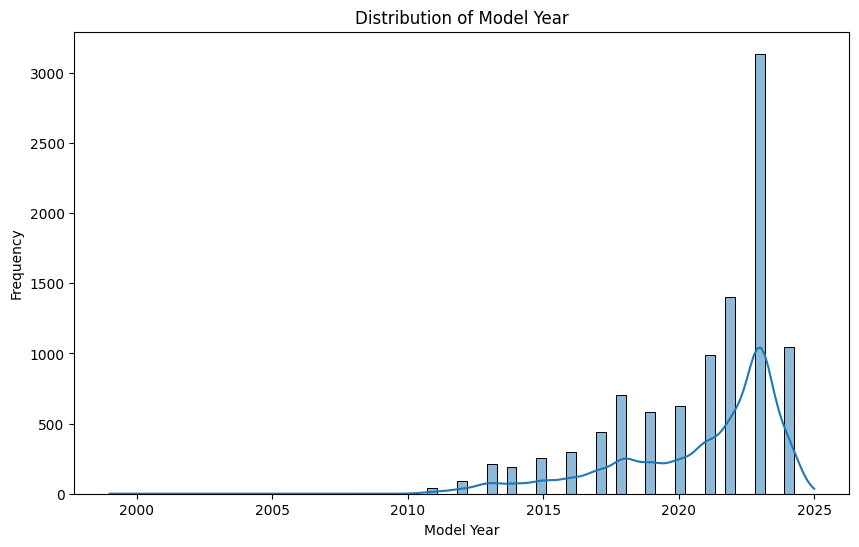

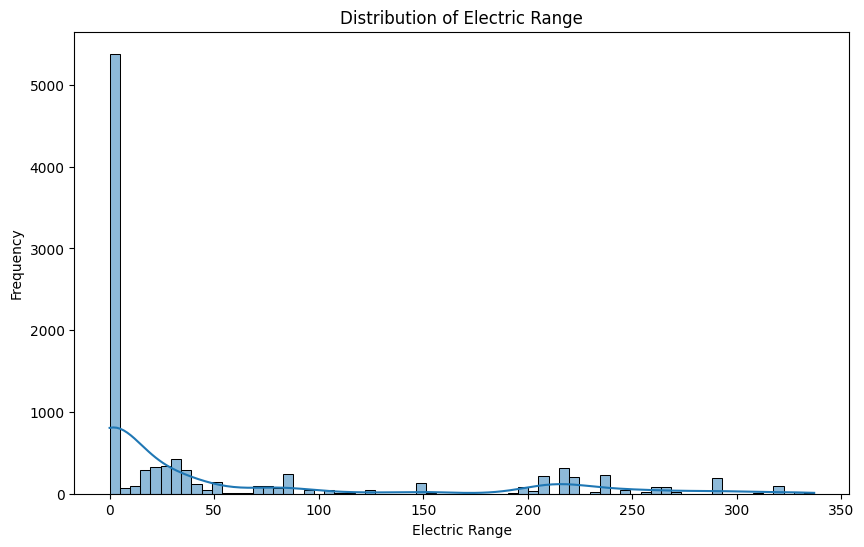

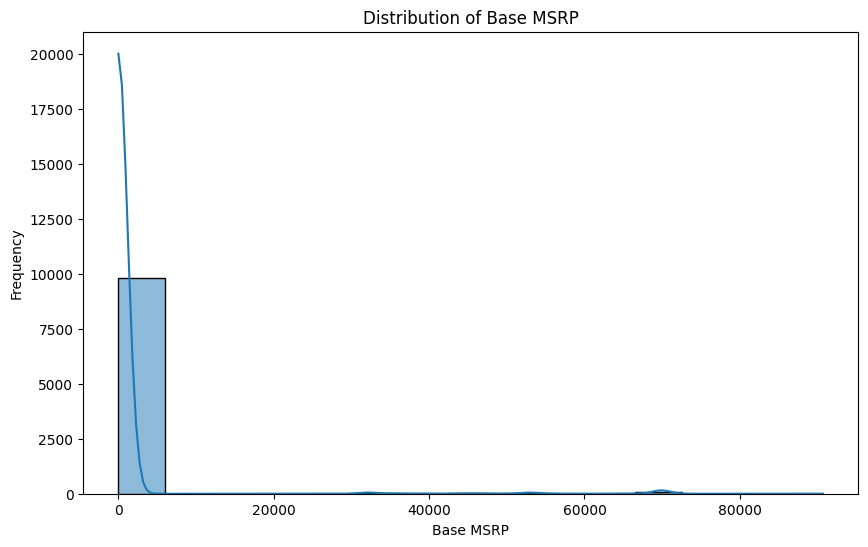

In [57]:
# Define columns to plot
columns = ['Model Year', 'Electric Range', 'Base MSRP']

# Create histograms for each column
for col in columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(sampled_df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


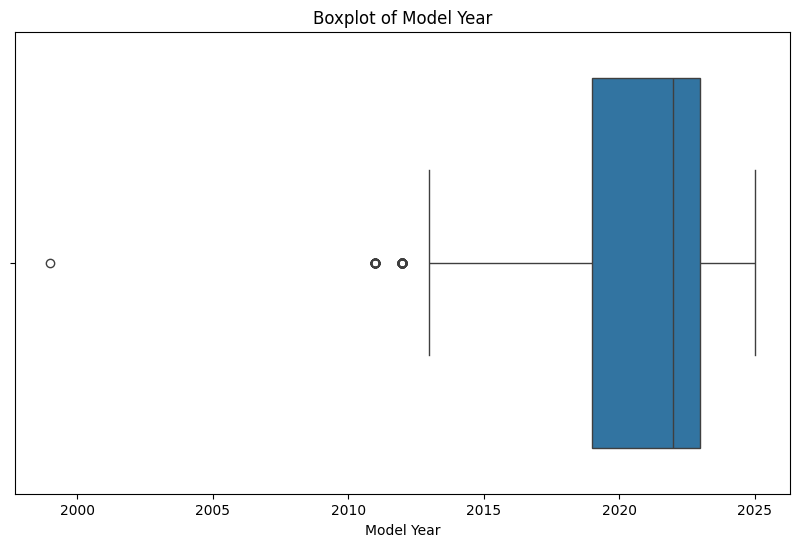

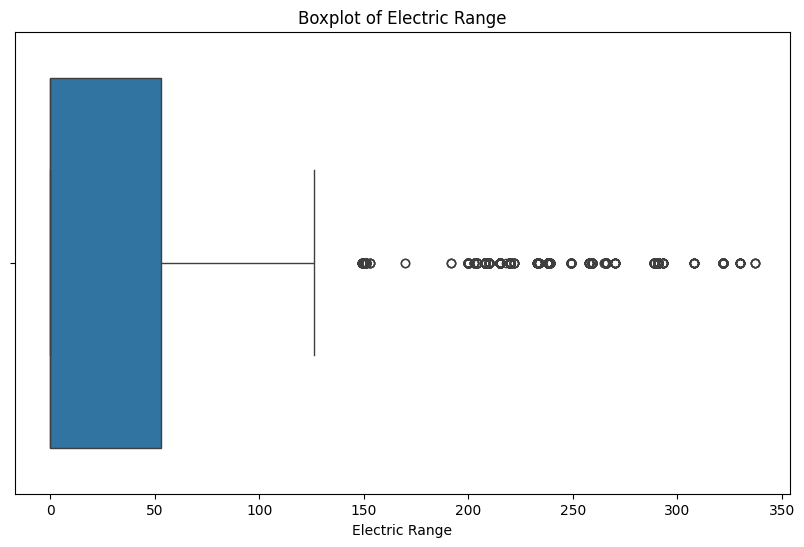

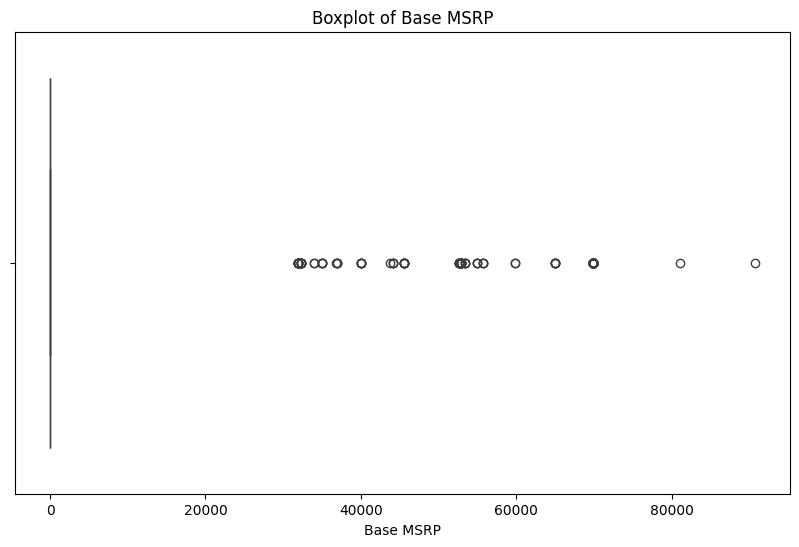

In [58]:
# Create boxplots for each column
for col in columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, data=sampled_df)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


### 7. Data Transformation - Log Transformation

Description: This section applies a log transformation to selected columns to address skewness or non-linearity and then visualizes the transformed data using boxplots.

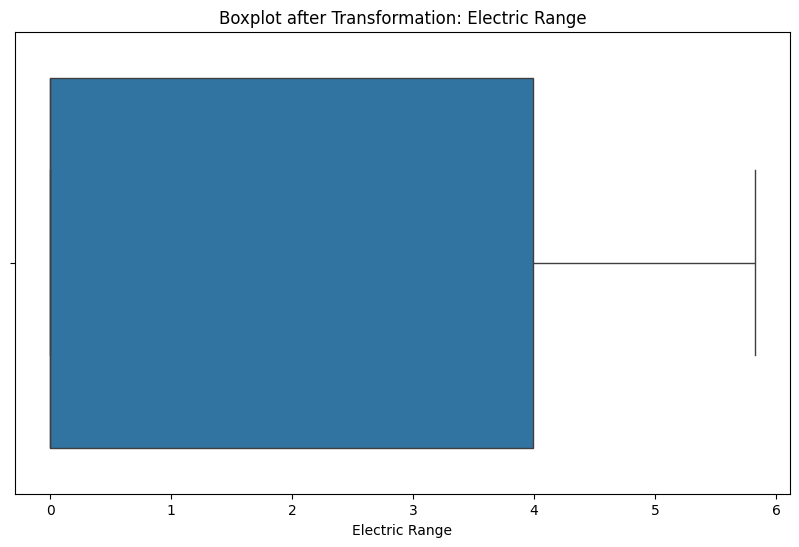

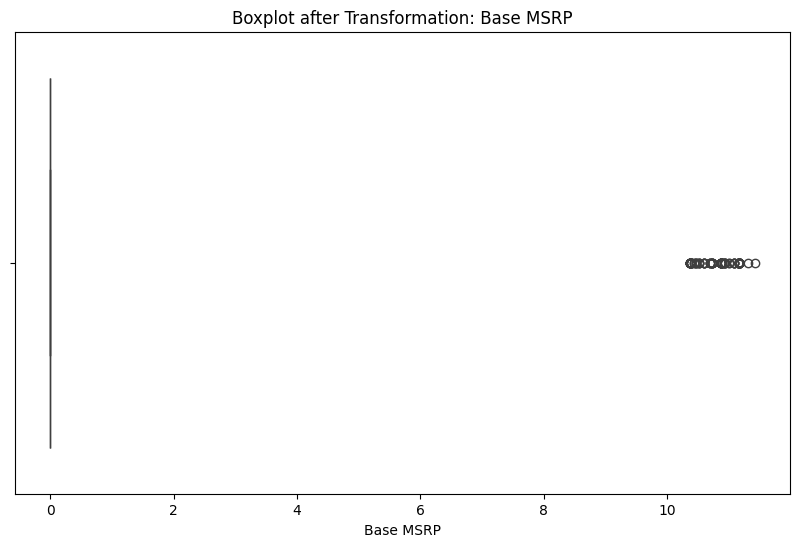

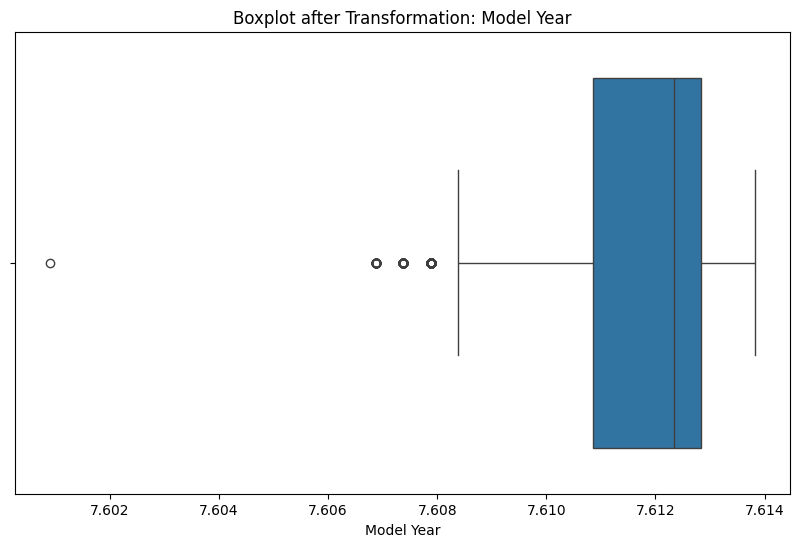

In [59]:
# Define columns to transform
columns = ['Electric Range', 'Base MSRP', 'Model Year']

# Create a copy of the DataFrame to avoid modifying the original data
transformed_df = sampled_df.copy()

# Apply transformations
for col in columns:
    transformed_df[col] = transformed_df[col].apply(lambda x: np.log(x + 1) if x > 0 else x)

# Plot box plots after transformation
for col in columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=transformed_df[col])
    plt.title(f'Boxplot after Transformation: {col}')
    plt.xlabel(col)
    plt.show()


### 8. Data Preprocessing - Dropping Unnecessary Columns

Description: This section drops columns that are not needed for the prediction process and prints the remaining columns.

In [60]:
import pandas as pd

# Assuming df is your DataFrame
# Define columns to drop
columns_to_drop = [
    'VIN (1-10)', 
    'County', 
    'City', 
    'State', 
    'Postal Code', 
    'DOL Vehicle ID', 
    'Vehicle Location', 
    'Electric Utility', 
    '2020 Census Tract'
]

# Drop the columns from the DataFrame
reduced_df = df.drop(columns=columns_to_drop)

# Print remaining columns
print("Remaining columns after dropping unnecessary ones:")
print(reduced_df.columns)


Remaining columns after dropping unnecessary ones:
Index(['Model Year', 'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP'],
      dtype='object')


### 9. Data Splitting - Train-Test Split

Description: This section splits the dataset into training and testing sets for model evaluation.

In [62]:
target_variable = 'Electric Range'
# Define features and target variable
X = reduced_df.drop(target_variable, axis=1)  # Features
y = reduced_df[target_variable] # Target


### 10. Model Training and Evaluation - Random Forest Regressor
Description: This section initializes and trains a Random Forest Regressor model, makes predictions on the test set, and evaluates its performance using MAE, MSE, and R² score.

In [63]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [67]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")


Mean Absolute Error: 0.6013031112140551
Mean Squared Error: 16.510562085859238
R^2 Score: 0.9979316304842485


### 12. Feature Importance - Plotting Top Features

Description: This section calculates and plots the top 10 most important features based on their importance scores from the trained Random Forest Regressor model.

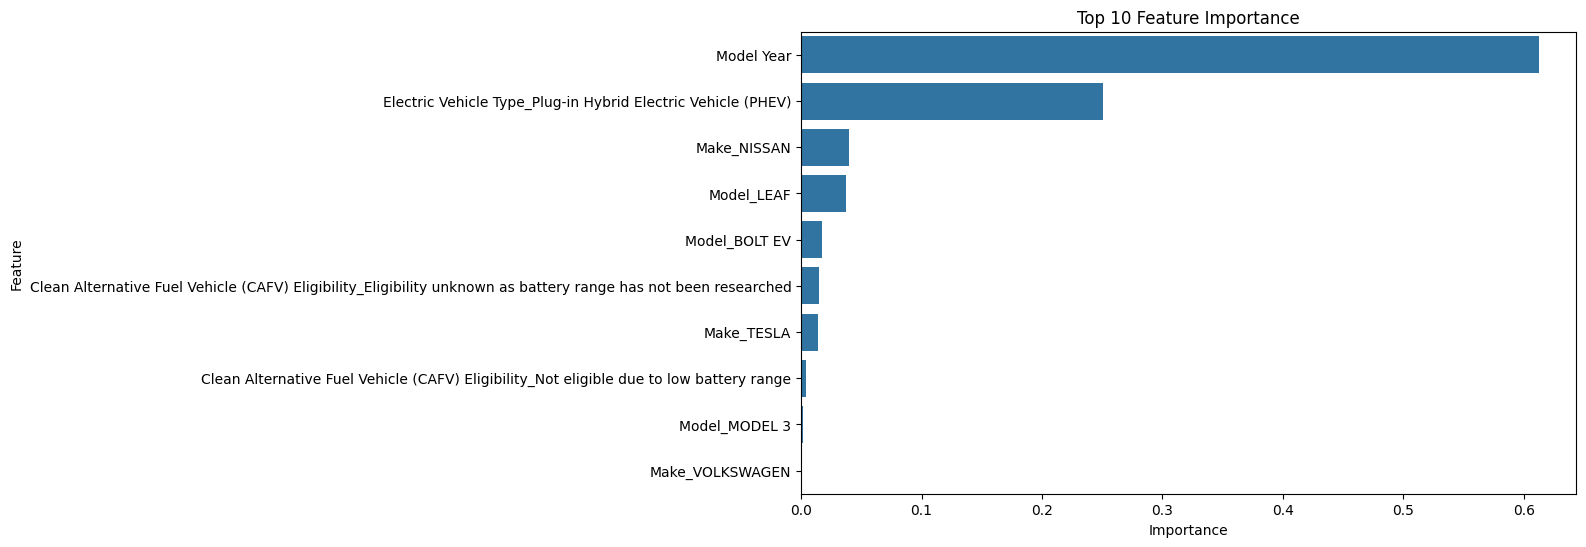

In [71]:
# Calculate feature importances and get indices of sorted features
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Select top 10 features
top_n = 10
top_indices = indices[:top_n]
top_importances = importances[top_indices]
top_features = X_train.columns[top_indices]

# Plot top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_importances, y=top_features)
plt.title('Top 10 Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
